In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

In [100]:
min_data_val = -2.5
max_data_val = 2.6
b_x = 0.01

bins_full = int((max_data_val-min_data_val)/b_x)

In [101]:
def find_B(x_occ, x_unocc, sig, b_x, x_0, x_N):
    
    num = int((x_N - x_0)/b_x)
    
    x = np.linspace(x_0, x_N, num)
            
    b_est_occ = np.exp(- ((x - np.ones_like(x)*x_occ)**2) / (np.ones_like(x)*(sig**2)*2) )
    b_est_unocc = np.exp(- ((x - np.ones_like(x)*x_unocc)**2) / (np.ones_like(x)*(sig**2)*2) )
    
    b_est_occ = b_est_occ/sum(b_est_occ)
    b_est_unocc = b_est_unocc/sum(b_est_unocc)
    
    B = np.array([b_est_occ, b_est_unocc])
    
    return B

In [102]:
def process_data(obs_seq, b_x, x_0, x_N):
    
    # x_0 and x_N should be entered with the same nr of sigfigs, and b_x 
    # should be smaller than the last decimal in x_0 and x_N
    
    len_counts = int((x_N - x_0)/b_x)
    
    processed_obs = []
    
    processed_obs = (obs_seq - np.ones(len(obs_seq))*x_0)/(np.ones(len(obs_seq))*b_x)
    processed_obs = (np.rint(processed_obs)).astype(int)

    return processed_obs

# Test

In [78]:
mu_0 = 0.1
mu_1 = 0.5

sigma = 0.05

x = np.random.normal(mu_1, sigma, size = 5)
print(x)

[0.46126562 0.466521   0.5648367  0.51271535 0.44855902]


In [79]:
B = find_B(mu_0, mu_1, sigma, b_x, min_data_val, max_data_val)

In [80]:
A = np.array([[9.99330213e-01, 6.69787002e-04],[4.96264643e-03, 9.95037354e-01]])

In [81]:
processed = process_data(x, b_x, min_data_val, max_data_val)

In [82]:
print(processed)

[ 96  97 106 101  95]


In [83]:
model = hmm.CategoricalHMM(n_components=2)
model.transmat_ = A
model.emissionprob_ = B
model.startprob_ = np.array([0.5, 0.5])

In [84]:
model.predict(np.array(processed).reshape(1,-1))

array([1, 1, 1, 1, 1])

# Fix sigma, sweep delta mu, data same distibution

In [85]:
sigma = 0.1

mu_0_num = 0.1

mu_1 = np.linspace(0.2, 0.55, 50)
mu_0 = np.ones_like(mu_1)*mu_0_num
delta_mu = mu_1 - mu_0

In [87]:
iterations = int(1e4)

sequence_len = 100

prob_error_per_dms = np.zeros_like(delta_mu)
prob_err_per_dms_error_bars = np.zeros_like(delta_mu)
A = np.array([[9.99330213e-01, 6.69787002e-04],[4.96264643e-03, 9.95037354e-01]])

for i in range(len(delta_mu)):
    B = find_B(mu_0_num, mu_1[i], sigma, b_x, min_data_val, max_data_val)
    model = hmm.CategoricalHMM(n_components=2)
    model.transmat_ = A
    model.emissionprob_ = B
    model.startprob_ = np.array([0.5, 0.5])
    
    error_counts = np.zeros(iterations)
    
    for j in range(iterations): 
        x_obs = np.random.normal(mu_1[i], sigma, size = sequence_len)
        x_obs = process_data(x_obs, b_x, min_data_val, max_data_val)
        #print(np.array(x_obs).reshape(1,-1).shape, j, max(x_obs), min(x_obs))
        result = model.predict(np.array(x_obs).reshape(1,-1))
        
        error_counts[j] = np.count_nonzero(result==0)
    
    prob_error_per_dms[i] = np.average(error_counts/(iterations*sequence_len))
    prob_err_per_dms_error_bars[i] = np.var(error_counts/(iterations*sequence_len))
        
        
        
        
        
    

5.2504375e-13


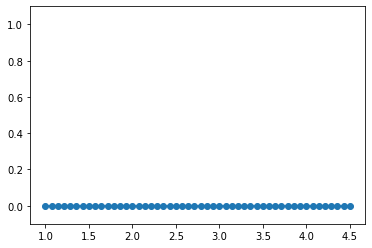

In [88]:
plt.scatter(delta_mu/sigma, prob_error_per_dms*sequence_len)
plt.errorbar(delta_mu/sigma, prob_error_per_dms, yerr=prob_err_per_dms_error_bars)
plt.ylim(-0.1, 1.1)
print(max(prob_err_per_dms_error_bars))

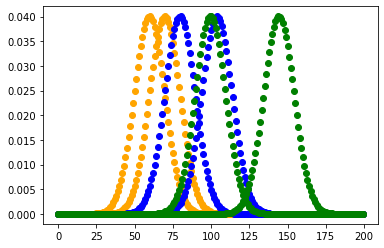

In [91]:
B = find_B(mu_0_num, mu_1[0], sigma, b_x, min_data_val, max_data_val)
plt.scatter(range(len(B[0])), B[0], color = 'orange')
plt.scatter(range(len(B[1])), B[1], color = 'orange')

B = find_B(mu_0_num+0.2, mu_1[20]+0.2, sigma, b_x, min_data_val, max_data_val)
plt.scatter(range(len(B[0])), B[0], color = 'blue')
plt.scatter(range(len(B[1])), B[1], color = 'blue')

B1 = find_B(mu_0_num+0.4, mu_1[49]+0.4, sigma, b_x, min_data_val, max_data_val)
plt.scatter(range(len(B1[0])), B1[0], color = 'green')
plt.scatter(range(len(B1[1])), B1[1], color = 'green')

# Fix delta, sweep sigma, data same distr

In [103]:
sigma = np.linspace(0.05, 0.4, 50)

mu_0_num = 0.1

mu_1_num = 0.5
mu_0 = np.ones_like(sigma)*mu_0_num
mu_1 = np.ones_like(sigma)*mu_1_num
delta_mu = mu_1 - mu_0

In [106]:
iterations = int(1e4)

sequence_len = 100

prob_error_per_dms = np.zeros_like(delta_mu)
prob_err_per_dms_error_bars = np.zeros_like(delta_mu)
A = np.array([[9.99330213e-01, 6.69787002e-04],[4.96264643e-03, 9.95037354e-01]])

for i in range(len(delta_mu)):
    B = find_B(mu_0_num, mu_1_num, sigma[i], b_x, min_data_val, max_data_val)
    model = hmm.CategoricalHMM(n_components=2)
    model.transmat_ = A
    model.emissionprob_ = B
    model.startprob_ = np.array([0.5, 0.5])
    
    error_counts = np.zeros(iterations)
    
    for j in range(iterations): 
        x_obs = np.random.normal(mu_1_num, sigma[i], size = sequence_len)
        x_obs = process_data(x_obs, b_x, min_data_val, max_data_val)
        #print(np.array(x_obs).reshape(1,-1).shape, j, max(x_obs), min(x_obs))
        result = model.predict(np.array(x_obs).reshape(1,-1))
        
        error_counts[j] = np.count_nonzero(result==0)
    
    prob_error_per_dms[i] = np.average(error_counts/(iterations*sequence_len))
    prob_err_per_dms_error_bars[i] = np.var(error_counts/(iterations*sequence_len))
        
        

6.835839599999999e-13


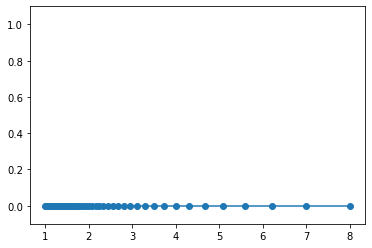

In [107]:
plt.scatter(delta_mu/sigma, prob_error_per_dms*sequence_len)
plt.errorbar(delta_mu/sigma, prob_error_per_dms, yerr=prob_err_per_dms_error_bars)
plt.ylim(-0.1, 1.1)
print(max(prob_err_per_dms_error_bars))

# Blip data, fix sigma, sweep delta mu

In [145]:
t_up_off_min = 10 # micro sec
t_up_off_max = 200 # micro sec
t_unocc_min = 10 # mic sec
t_unocc_max = 200 # mic sec

In [158]:
ind_t_up_off_min = int((2.5e6)*10/1e6 )# index
ind_t_up_off_max = int((2.5e6)*200/1e6 )# index
ind_t_unocc_min = int((2.5e6)*10/1e6) # index
ind_t_unocc_max = int((2.5e6)*200/1e6) # index

## Test

In [214]:
t_off_rand = int(np.random.uniform(ind_t_up_off_min, ind_t_up_off_max))
t_unocc_rand = int(np.random.uniform(ind_t_unocc_min, ind_t_unocc_max))

t_on_rand = t_off_rand + t_unocc_rand

In [215]:
mu_0 = 0
mu_1 = 0
sigma = 0.1

T_ind = 1700

In [216]:
init_occ_seq = np.random.normal(mu_0, sigma, size = t_off_rand)
unocc_seq = np.random.normal(mu_1, sigma, size = t_unocc_rand)
final_occ_seq = np.random.normal(mu_0, sigma, size = int(T_ind - t_on_rand))

match = np.concatenate((np.zeros_like(init_occ_seq), np.ones_like(unocc_seq), np.zeros_like(final_occ_seq)))

In [217]:
seq = np.concatenate((init_occ_seq, unocc_seq, final_occ_seq))

seq_int = process_data(seq, b_x, min_data_val, max_data_val)

In [218]:
A = np.array([[9.99330213e-01, 6.69787002e-04],[4.96264643e-03, 9.95037354e-01]])
B = find_B(mu_0, mu_1, sigma, b_x, min_data_val, max_data_val)

model = hmm.CategoricalHMM(n_components=2)
model.transmat_ = A
model.emissionprob_ = B
model.startprob_ = np.array([0.5, 0.5])

res = model.predict(np.array(seq_int).reshape(1,-1))

print(sum(np.abs(res-match)))

478.0


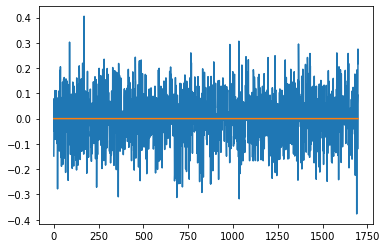

In [219]:
plt.plot(np.array(range(len(seq))), seq)
plt.plot(np.array(range(len(seq))), res)

## Real run

In [222]:
sigma = 0.1

mu_0_num = 0.1

mu_1 = np.linspace(0.1, 0.55, 50)
mu_0 = np.ones_like(mu_1)*mu_0_num
delta_mu = mu_1 - mu_0

In [223]:
print(delta_mu)

[0.         0.00918367 0.01836735 0.02755102 0.03673469 0.04591837
 0.05510204 0.06428571 0.07346939 0.08265306 0.09183673 0.10102041
 0.11020408 0.11938776 0.12857143 0.1377551  0.14693878 0.15612245
 0.16530612 0.1744898  0.18367347 0.19285714 0.20204082 0.21122449
 0.22040816 0.22959184 0.23877551 0.24795918 0.25714286 0.26632653
 0.2755102  0.28469388 0.29387755 0.30306122 0.3122449  0.32142857
 0.33061224 0.33979592 0.34897959 0.35816327 0.36734694 0.37653061
 0.38571429 0.39489796 0.40408163 0.41326531 0.42244898 0.43163265
 0.44081633 0.45      ]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


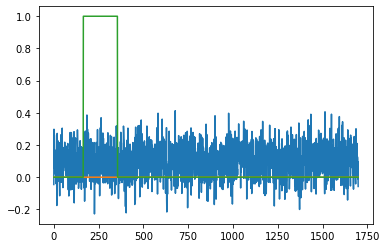

In [306]:
iterations = int(1e4)
T_ind = 1700


prob_error_per_dms = np.zeros_like(delta_mu)
prob_err_per_dms_error_bars = np.zeros_like(delta_mu)
prob_correct_per_dms = np.zeros_like(delta_mu)
A = np.array([[9.99330213e-01, 6.69787002e-04],[4.96264643e-03, 9.95037354e-01]])

for i in range(len(delta_mu)):
    print(i)
    
    B = find_B(mu_0_num, mu_1[i], sigma, b_x, min_data_val, max_data_val)
    model = hmm.CategoricalHMM(n_components=2)
    model.transmat_ = A
    model.emissionprob_ = B
    model.startprob_ = np.array([0.5, 0.5])
    
    error_counts = np.zeros(iterations)
    corr_count = np.zeros(iterations)
    
    for j in range(iterations): 
        t_off_rand = int(np.random.uniform(ind_t_up_off_min, ind_t_up_off_max))
        t_unocc_rand = int(np.random.uniform(ind_t_unocc_min, ind_t_unocc_max))
        t_on_rand = t_off_rand + t_unocc_rand

        init_occ_seq = np.random.normal(mu_0_num, sigma, size = t_off_rand)
        unocc_seq = np.random.normal(mu_1[i], sigma, size = t_unocc_rand)
        final_occ_seq = np.random.normal(mu_0_num, sigma, size = int(T_ind - t_on_rand))

        match = np.concatenate((np.zeros_like(init_occ_seq), np.ones_like(unocc_seq), np.zeros_like(final_occ_seq)))

        seq = np.concatenate((init_occ_seq, unocc_seq, final_occ_seq))
        x_obs = process_data(seq, b_x, min_data_val, max_data_val)
        
        res = model.predict(np.array(x_obs).reshape(1,-1))
        
        error_counts[j] = sum(np.abs(res-match))
        
        if sum(res) >= 1:
            corr_count[j] = 1
            
        if i == 0 and j == 0:
            plt.plot(range(len(seq)), seq)
            plt.plot(range(len(seq)), res)
            plt.plot(range(len(seq)), match)
    
    prob_error_per_dms[i] = np.average(error_counts/(iterations*len(seq)))
    prob_err_per_dms_error_bars[i] = np.var(error_counts/(iterations*len(seq)))
    prob_correct_per_dms[i] = np.average(corr_count)
        
        

Text(0.5, 0, 'SNR')

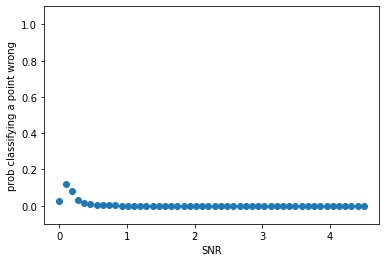

In [307]:
plt.scatter(delta_mu/sigma, prob_error_per_dms*len(seq))
#plt.errorbar(delta_mu/sigma, prob_error_per_dms, yerr=prob_err_per_dms_error_bars)
plt.ylim(-0.1, 1.1)
plt.ylabel('prob classifying a point wrong')
plt.xlabel('SNR')

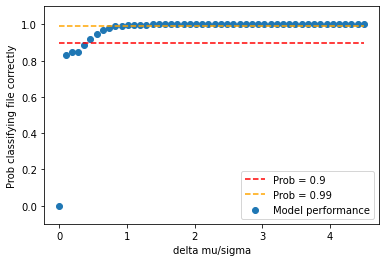

In [308]:
plt.scatter(delta_mu/sigma, prob_correct_per_dms, label='Model performance')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.9,'--', color='red', label='Prob = 0.9')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.99,'--', color='orange', label='Prob = 0.99')
#plt.errorbar(delta_mu/sigma, prob_error_per_dms, yerr=prob_err_per_dms_error_bars)
plt.ylim(-0.1, 1.1)
plt.ylabel('Prob classifying file correctly')
plt.xlabel('delta mu/sigma')
plt.legend()

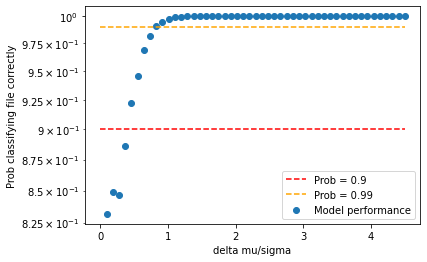

In [309]:
plt.scatter(delta_mu/sigma, prob_correct_per_dms, label='Model performance')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.9,'--', color='red', label='Prob = 0.9')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.99,'--', color='orange', label='Prob = 0.99')
#plt.errorbar(delta_mu/sigma, prob_error_per_dms, yerr=prob_err_per_dms_error_bars)
plt.yscale('log')
plt.ylabel('Prob classifying file correctly')
plt.xlabel('delta mu/sigma')
plt.legend()

In [242]:
print(sum(prob_correct_per_dms))

48.212900000000005


In [255]:
print(delta_mu[11]/sigma)

1.0102040816326532


In [252]:
prob_correct_per_dms[:10]

array([0.    , 0.8297, 0.8433, 0.8519, 0.8813, 0.9226, 0.9513, 0.9676,
       0.9837, 0.9903])

## spin down

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


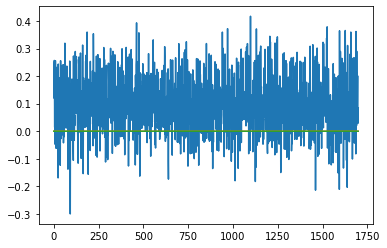

In [294]:
iterations = int(1e4)
T_ind = 1700


prob_error_per_dms = np.zeros_like(delta_mu)
prob_err_per_dms_error_bars = np.zeros_like(delta_mu)
prob_correct_per_dms = np.zeros_like(delta_mu)
A = np.array([[9.99330213e-01, 6.69787002e-04],[4.96264643e-03, 9.95037354e-01]])

for i in range(len(delta_mu)):
    print(i)
    
    B = find_B(mu_0_num, mu_1[i], sigma, b_x, min_data_val, max_data_val)
    model = hmm.CategoricalHMM(n_components=2)
    model.transmat_ = A
    model.emissionprob_ = B
    model.startprob_ = np.array([0.5, 0.5])
    
    error_counts = np.zeros(iterations)
    corr_count = np.zeros(iterations)
    
    for j in range(iterations): 
        seq = np.random.normal(mu_0_num, sigma, size = int(T_ind))

        match = np.zeros_like(seq)

        x_obs = process_data(seq, b_x, min_data_val, max_data_val)
        
        res = model.predict(np.array(x_obs).reshape(1,-1))
        
        error_counts[j] = sum(np.abs(res-match))
        
        if sum(res) < 1:
            corr_count[j] = 1
            
        if i == 0 and j == 0:
            plt.plot(range(len(seq)), seq)
            plt.plot(range(len(seq)), res)
            plt.plot(range(len(seq)), match)
    
    prob_error_per_dms[i] = np.average(error_counts/(iterations*len(seq)))
    prob_err_per_dms_error_bars[i] = np.var(error_counts/(iterations*len(seq)))
    prob_correct_per_dms[i] = np.average(corr_count)
        

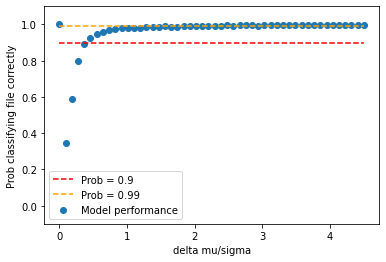

In [295]:
plt.scatter(delta_mu/sigma, prob_correct_per_dms, label='Model performance')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.9,'--', color='red', label='Prob = 0.9')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.99,'--', color='orange', label='Prob = 0.99')
#plt.errorbar(delta_mu/sigma, prob_error_per_dms, yerr=prob_err_per_dms_error_bars)
plt.ylim(-0.1, 1.1)
plt.yscale('linear')
plt.ylabel('Prob classifying file correctly')
plt.xlabel('delta mu/sigma')
plt.legend()

(0.82, 1.01)

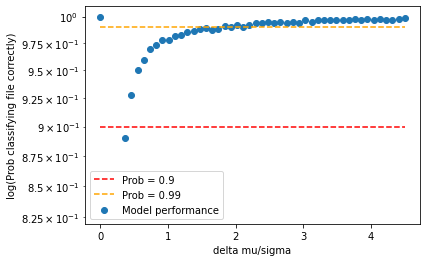

In [296]:
plt.scatter(delta_mu/sigma, prob_correct_per_dms, label='Model performance')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.9,'--', color='red', label='Prob = 0.9')
plt.plot(delta_mu/sigma, np.ones_like(prob_correct_per_dms)*0.99,'--', color='orange', label='Prob = 0.99')
#plt.errorbar(delta_mu/sigma, prob_error_per_dms, yerr=prob_err_per_dms_error_bars)
plt.yscale('log')
plt.ylabel('Prob classifying file correctly')
plt.xlabel('delta mu/sigma')
plt.legend()
plt.ylim(0.82, 1.01)

In [304]:
prob_correct_per_dms[20]

0.9908

In [303]:
delta_mu[20]/sigma

1.836734693877551